<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [ ]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [ ]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [5]:


URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

df=pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


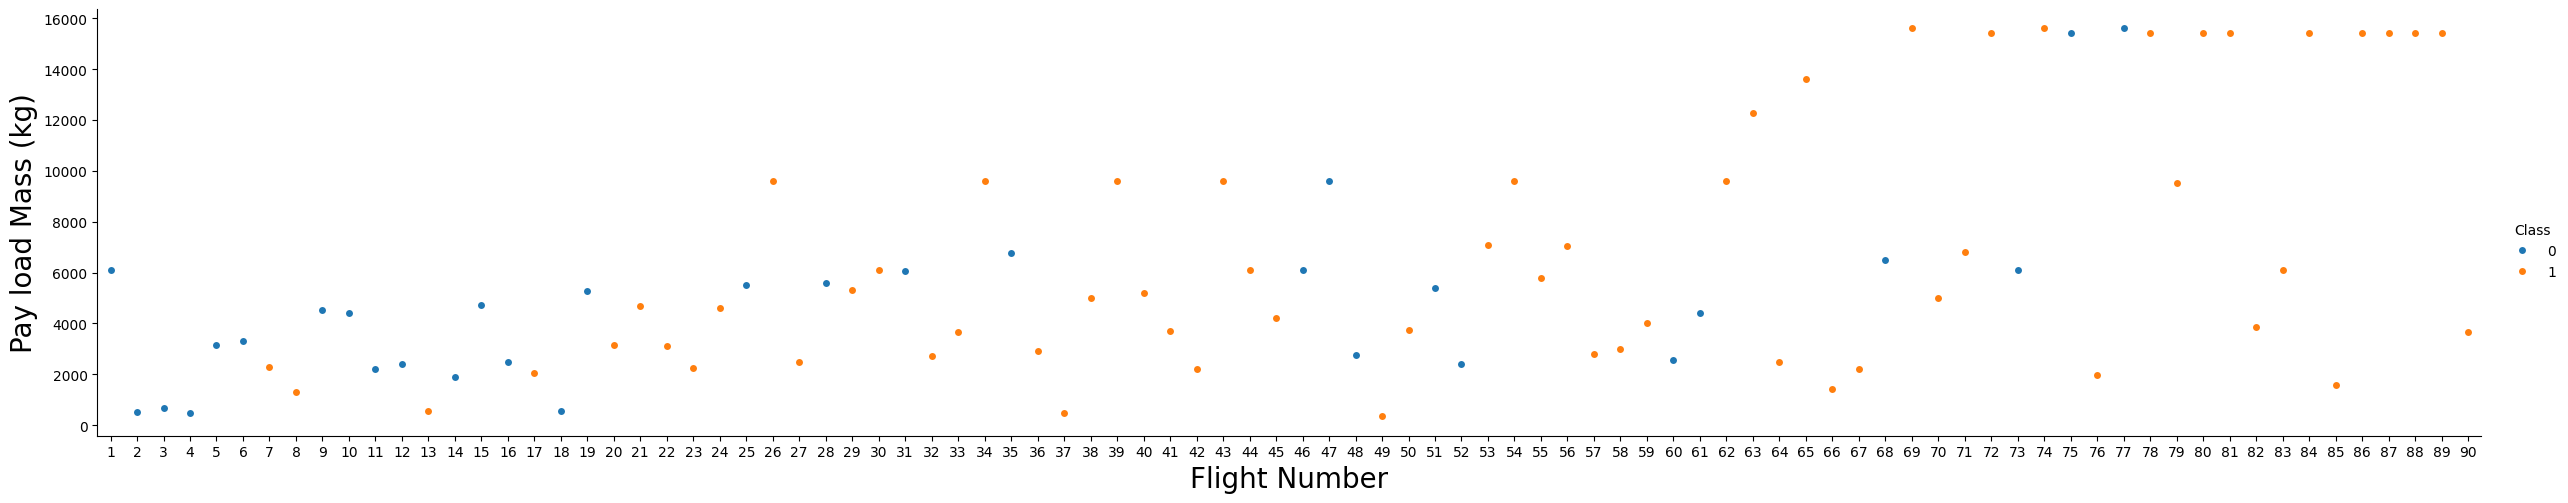

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


In [ ]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


<Figure size 1000x600 with 0 Axes>

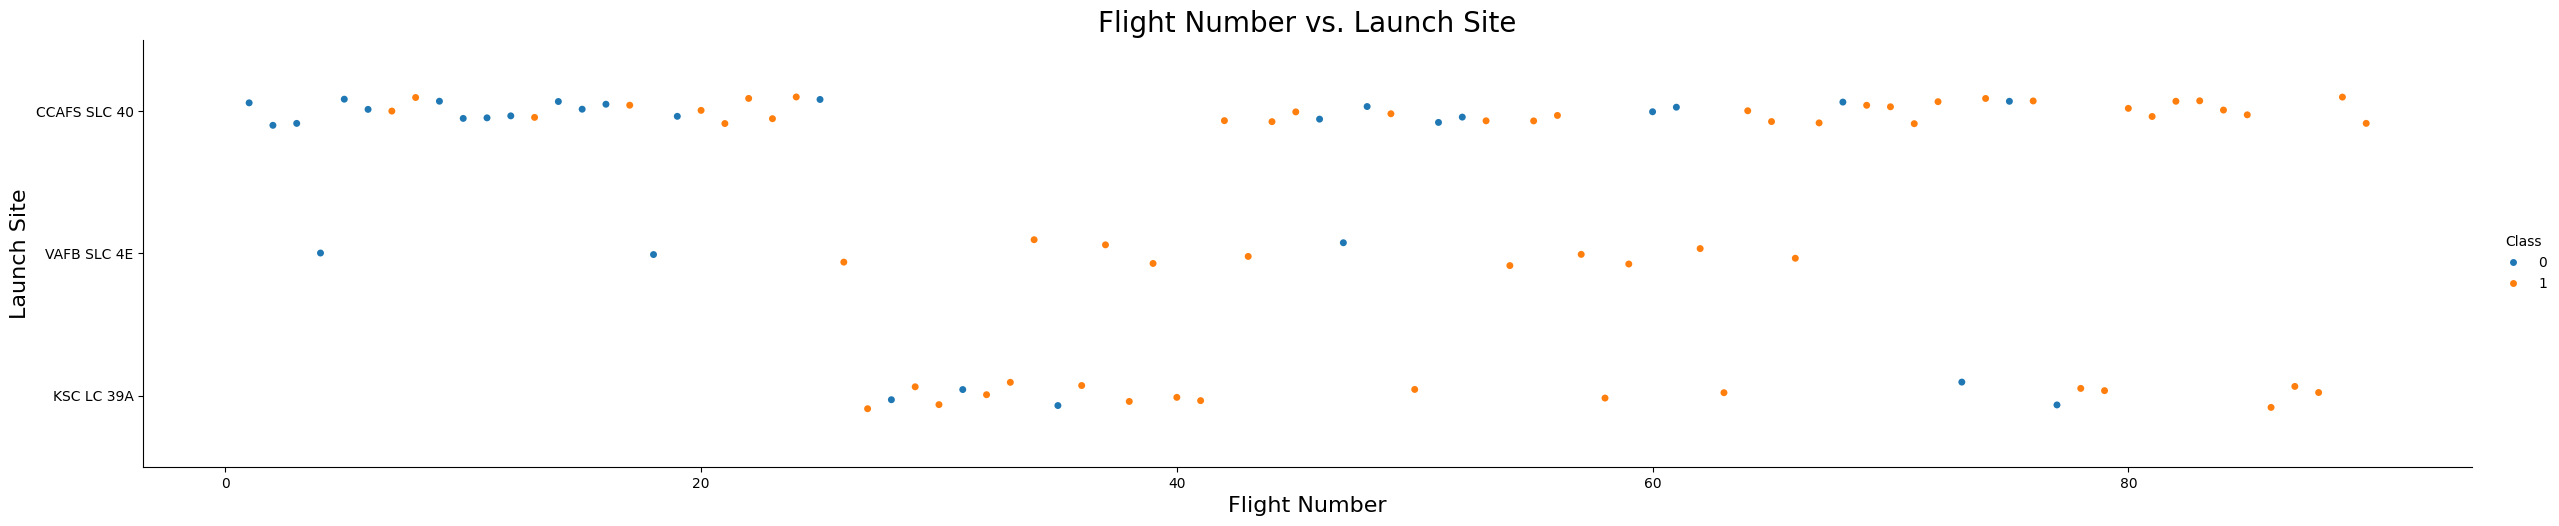

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has been loaded with the data from the URL
# df = pd.read_csv(URL)

# Plotting FlightNumber vs. LaunchSite with Class as the hue
plt.figure(figsize=(10, 6))
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, aspect=5, kind='strip')
plt.title('Flight Number vs. Launch Site', fontsize=20)
plt.xlabel('Flight Number', fontsize=16)
plt.ylabel('Launch Site', fontsize=16)
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


In [ ]:
### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


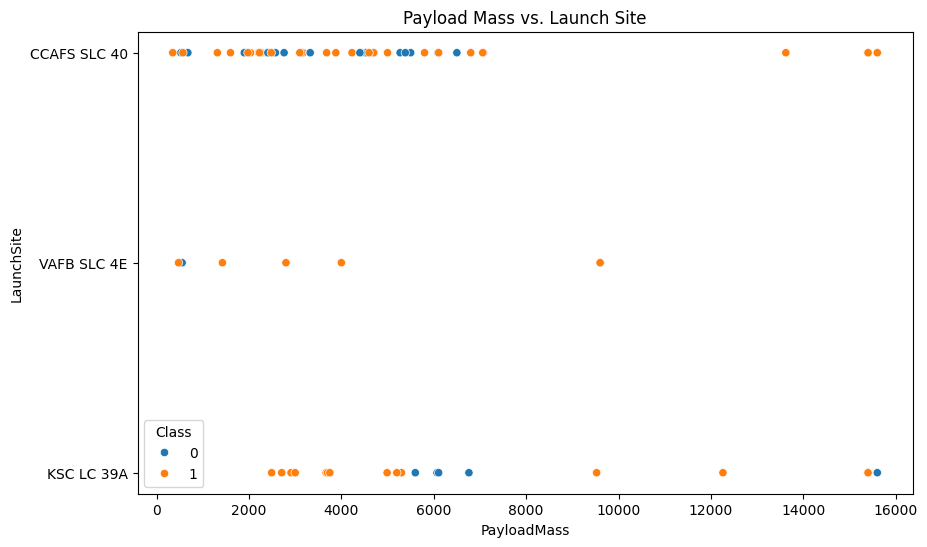

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class')
plt.title('Payload Mass vs. Launch Site', fontsize=20)
plt.xlabel('Payload Mass (kg)', fontsize=16)
plt.ylabel('Launch Site', fontsize=16)
plt.show()


Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


In [ ]:
### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


<ipython-input-8-6ce44a1adbb9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_rate.index, y=success_rate.values, palette='viridis')


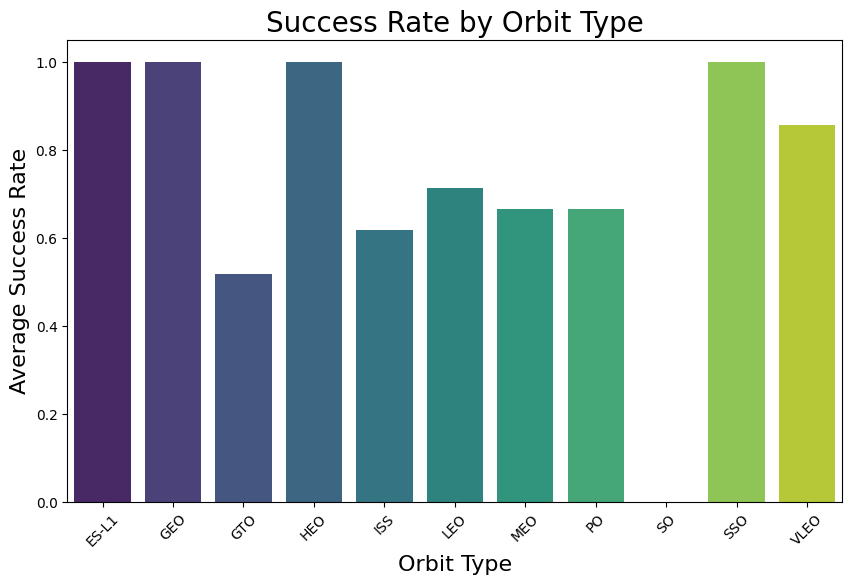

In [8]:
# Calculate the success rate for each orbit type
success_rate = df.groupby('Orbit')['Class'].mean()

# Create a bar chart for the success rate of each orbit
plt.figure(figsize=(10, 6))
sns.barplot(x=success_rate.index, y=success_rate.values, palette='viridis')
plt.title('Success Rate by Orbit Type', fontsize=20)
plt.xlabel('Orbit Type', fontsize=16)
plt.ylabel('Average Success Rate', fontsize=16)
plt.xticks(rotation=45)
plt.show()


Analyze the ploted bar chart try to find which orbits have high sucess rate.


In [ ]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


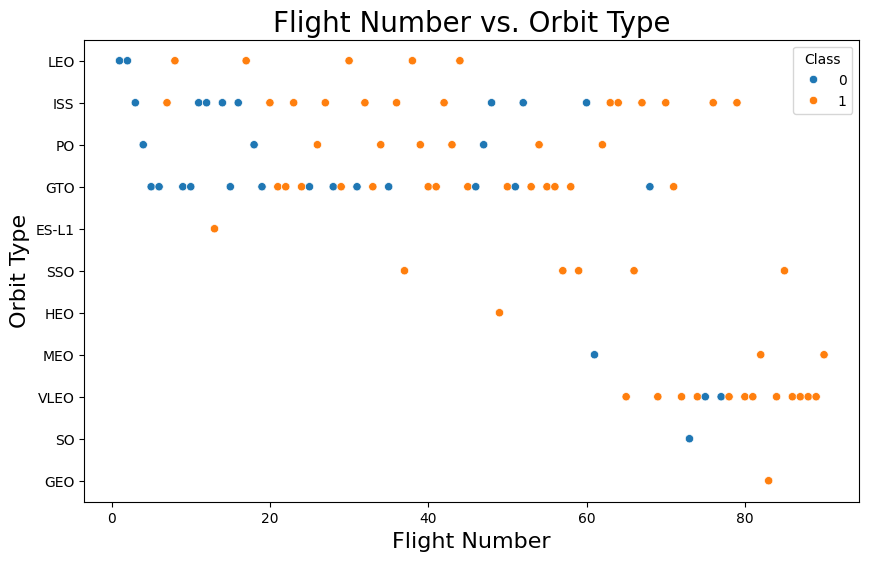

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class')
plt.title('Flight Number vs. Orbit Type', fontsize=20)
plt.xlabel('Flight Number', fontsize=16)
plt.ylabel('Orbit Type', fontsize=16)
plt.show()


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


In [ ]:
### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


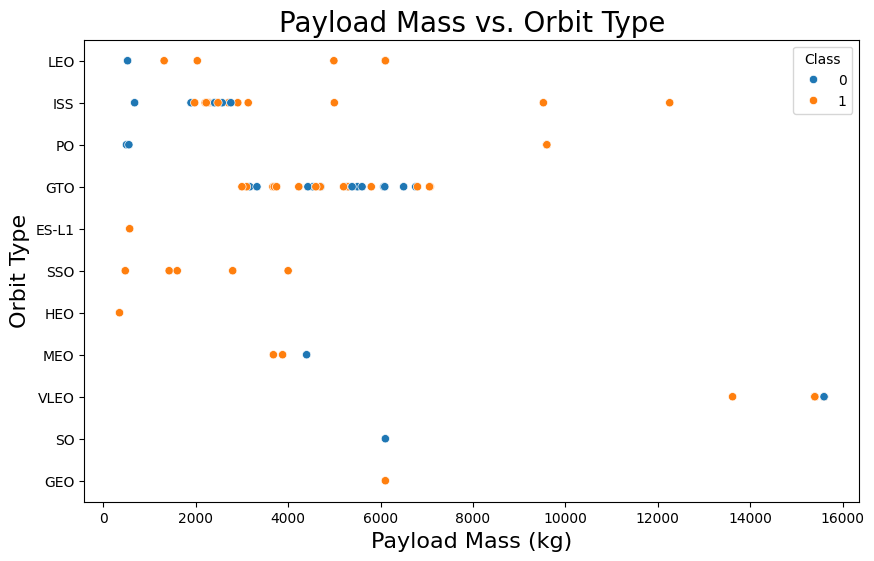

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class')
plt.title('Payload Mass vs. Orbit Type', fontsize=20)
plt.xlabel('Payload Mass (kg)', fontsize=16)
plt.ylabel('Orbit Type', fontsize=16)
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


In [35]:
print(df['Class'].unique())

[0 1]


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [39]:
df["Date"].dtype


dtype('<M8[ns]')

In [38]:
print(df['Class'].isnull().sum())

0


In [40]:
print(df['Outcome'].unique())

['None None' 'False Ocean' 'True Ocean' 'False ASDS' 'None ASDS'
 'True RTLS' 'True ASDS' 'False RTLS']


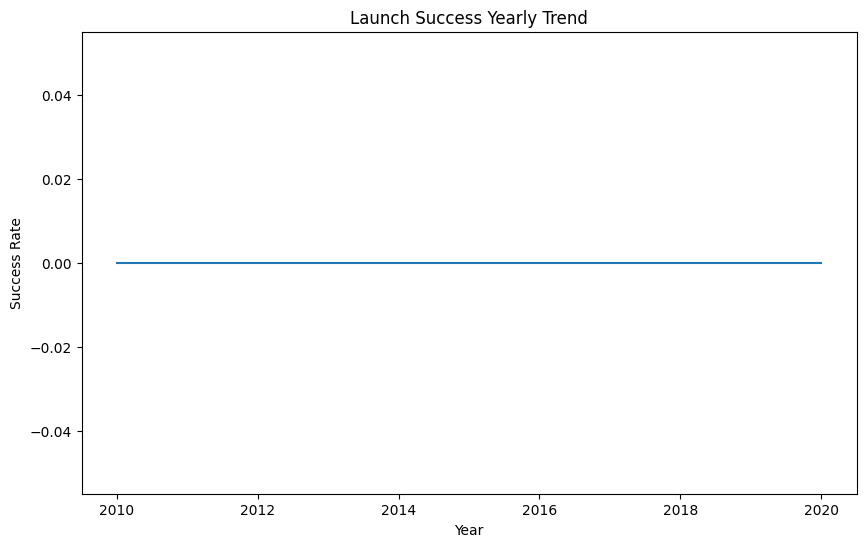

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has been loaded with the data
# df = pd.read_csv("your_data_file.csv")

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Calculate the success rate for each year
# This assumes 'Success' in the 'Outcome' column indicates a successful launch
success_rate_per_year = df.groupby('Year')['Outcome'].apply(lambda x: (x == 'Success').mean())

# Convert the Series to a DataFrame for plotting
success_rate_per_year_df = success_rate_per_year.reset_index()
success_rate_per_year_df.columns = ['Year', 'Success Rate']

# Create a line chart for the success rate yearly trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=success_rate_per_year_df, x='Year', y='Success Rate')
plt.title('Launch Success Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()


In [44]:
def Extract_year(df):
    year = []
    for i in df["Date"]:
        year.append(i.year) # Use the 'year' attribute of the Timestamp object
    return year

# Apply the Extract_year function to the DataFrame
df['Year'] = Extract_year(df)


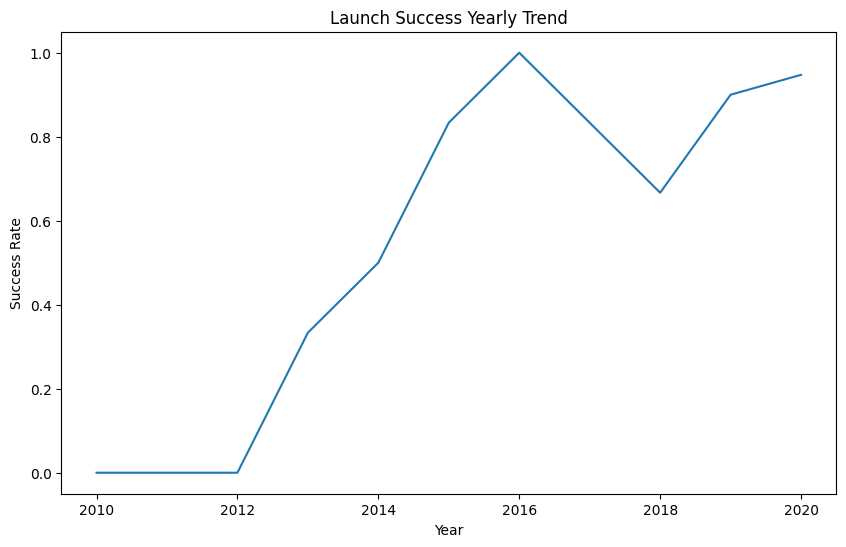

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the success rate for each year
# This assumes any non-'None None' outcome might indicate a successful launch
success_rate_per_year = df.groupby('Year')['Outcome'].apply(lambda x: (x != 'None None').mean())

# Convert the Series to a DataFrame for plotting
success_rate_per_year_df = success_rate_per_year.reset_index()
success_rate_per_year_df.columns = ['Year', 'Success Rate']

# Create a line chart for the success rate yearly trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=success_rate_per_year_df, x='Year', y='Success Rate')
plt.title('Launch Success Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()


you can observe that the sucess rate since 2013 kept increasing till 2020


In [ ]:
## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

In [49]:
### TASK  7: Create dummy variables to categorical columns
# Assuming 'LaunchSite' and 'Orbit' are categorical columns
import pandas as pd

# Assuming df is your DataFrame and it has been loaded with the data
# df = pd.read_csv("your_data_file.csv")

# Select the features
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Create dummy variables for 'LaunchSite' and 'Orbit'
features_with_dummies = pd.get_dummies(features, columns=['LaunchSite', 'Orbit'])

# Display the head of the DataFrame with dummy variables
features_with_dummies.head()



,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,...,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO
0,1,6104.959412,1,False,False,False,NaN,1.0,0,B0003,...,0,0,0,0,1,0,0,0,0,0
1,2,525.000000,1,False,False,False,NaN,1.0,0,B0005,...,0,0,0,0,1,0,0,0,0,0
2,3,677.000000,1,False,False,False,NaN,1.0,0,B0007,...,0,0,0,1,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,NaN,1.0,0,B1003,...,0,0,0,0,0,0,1,0,0,0
4,5,3170.000000,1,False,False,False,NaN,1.0,0,B1004,...,0,1,0,0,0,0,0,0,0,0


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
# HINT: Use get_dummies() function on the categorical columns

In [51]:
### TASK  8: Cast all numeric columns to `float64`
import pandas as pd

# Attempt to convert all columns to float64, but handle errors for non-numeric columns
for col in features_with_dummies.columns:
    try:
        features_with_dummies[col] = features_with_dummies[col].astype('float64')
    except ValueError:
        print(f"Column '{col}' contains non-numeric values.")

# Display the head of the DataFrame with all features including the encoded ones
features_one_hot = features_with_dummies
features_one_hot.head()


Column 'LandingPad' contains non-numeric values.
Column 'Serial' contains non-numeric values.


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,...,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO
0,1.0,6104.959412,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B0003,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B0005,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B0007,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B1003,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B1004,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Assuming 'PayloadMass', 'FlightNumber', and other numeric columns exist in your DataFrame
# Make sure these column names exist in your DataFrame
numeric_columns = ['PayloadMass', 'FlightNumber']

# Convert non-numeric values to NaN for the specified columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Now, safely convert the specified numeric columns to float64
df[numeric_columns] = df[numeric_columns].astype('float64')

# Display the head of the DataFrame to verify the conversion
df.head()



,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1.0,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2.0,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3.0,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4.0,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5.0,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [ ]:
# HINT: use astype function

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
